In [2]:
import osmnx as ox
import geopandas as gpd

%matplotlib inline
ox.__version__


'1.7.1'

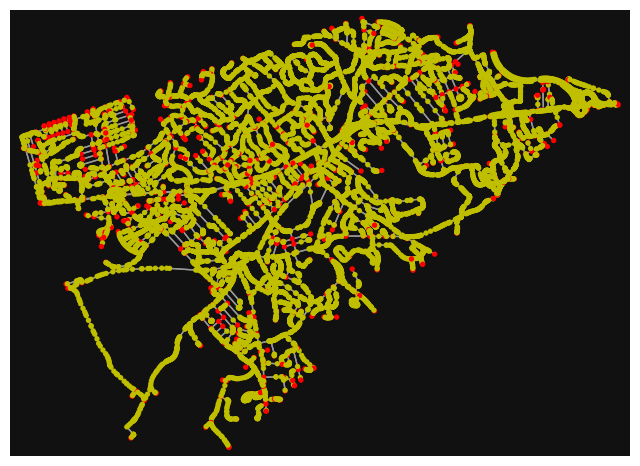

In [3]:
G = ox.graph_from_place('Wellesley', network_type="drive", simplify=False)
nc = ["r" if ox.simplification._is_endpoint(G, node) else "y" for node in G.nodes()]
# ox.consolidate_intersections(G)
fig, ax = ox.plot_graph(G, node_color=nc)


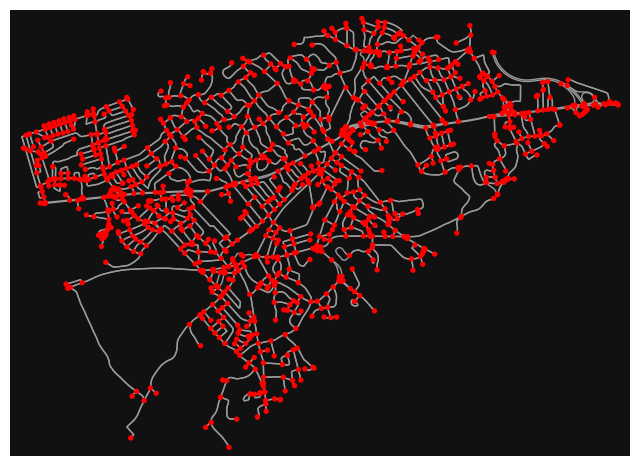

In [4]:
G = ox.simplify_graph(G)
fig, ax = ox.plot_graph(G, node_color = 'r')


In [2]:
G_proj = ox.project_graph(G)
G2 = ox.consolidate_intersections(G_proj, rebuild_graph=True, dead_ends=False)
fig, ax = ox.plot_graph(G2, node_color='r')


NameError: name 'ox' is not defined

In [1]:
edges = ox.graph_to_gdfs(G, nodes=False)

    # Check if maxspeeds exist already or not
if "maxspeed" not in edges.columns:
    hwy_speed = {"residential": 40, "secondary": 48, "tertiary": 47, "motorway": 88.5}
    G = ox.add_edge_speeds(G, hwy_speeds=hwy_speed)
else:
    G = ox.add_edge_speeds(G)

edges


NameError: name 'ox' is not defined

In [18]:
import osmnx as ox
import networkx as nx
import geopandas as gpd

%matplotlib inline
ox.__version__


import graph_processing as gp
G = ox.graph_from_place('Wellesley', network_type="drive", simplify=False)
G = gp.process_graph(G)


/home/rdave/.local/lib/python3.10/site-packages/osmnx/simplification.py:533: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '122-0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf.loc[idx, "cluster"] = f"{cluster_label}-{suffix}"


In [19]:
G = gp.add_speeds(G)
edges = ox.graph_to_gdfs(G, nodes=False)
edges = gp.add_lanes(edges)


In [20]:
edges = gp.add_capacities(edges)
nx.set_edge_attributes(G, edges['capacity'], 'capacity')
nx.set_edge_attributes(G, edges['lanes'], 'lanes')
nx.set_edge_attributes(G, edges['speed_kph'], 'speed_kph')
nx.set_edge_attributes(G, edges['highway'], 'highway')


In [21]:
new_edges = ox.graph_to_gdfs(G, nodes=False)
new_edges


osmid  oneway lanes     ref  \
u   v   key                                                            
0   1   0                              9335246   False     3  MA 135   
1   0   0                              9335246   False     3  MA 135   
    3   0                              9335246   False     3  MA 135   
    222 0                              9335348   False     2     NaN   
2   3   0    [9335976, 1211966172, 1211966173]   False     2     NaN   
...                                        ...     ...   ...     ...   
929 929 0                           1056651064   False     2     NaN   
        1                           1056651064   False     2     NaN   
    11  0                           1056651064   False     2     NaN   
931 450 0                             93392382    True     2    MA 9   
932 79  0                              9334894    True     2    MA 9   

                         name      highway width reversed       length  \
u   v   key                                                              
0   1   0      Central Street    secondary  18.3    False    34.654000   
1   0   0      Central Street    secondary  18.3     True    34.654000   
    3   0      Central Street    secondary  18.3    False   179.125000   
    222 0           Pond Road  residential  12.2     True  1768.884000   
2   3   0        Bacon Street     tertiary  12.2    False   257.605000   
...                       ...          ...   ...      ...          ...   
929 929 0      Fieldstone Way  residential   NaN    False   268.378000   
        1      Fieldstone Way  residential   NaN     True   268.378000   
    11  0      Fieldstone Way  residential   NaN     True   106.687000   
931 450 0    Worcester Street        trunk  30.5    False   166.768000   
932 79  0    Worcester Street        trunk  30.5    False    32.964516   

             u_original  v_original  \
u   v   key                           
0   1   0      68220624    70436135   
1   0   0      70436135    68220624   
    3   0      70436135    70442280   
    222 0      70436135    70493973   
2   3   0      68234368    70442280   
...                 ...         ...   
929 929 0    9709434242  9709434242   
        1    9709434242  9709434242   
    11  0    9709434242  6708505282   
931 450 0    9251889816    70438029   
932 79  0    9359910376    70425525   

                                                      geometry  speed_kph  \
u   v   key                                                                 
0   1   0    LINESTRING (308618.287 4684995.587, 308650.650...       48.0   
1   0   0    LINESTRING (308650.650 4685008.184, 308618.287...       48.0   
    3   0    LINESTRING (308650.650 4685008.184, 308718.046...       48.0   
    222 0    LINESTRING (308650.650 4685008.184, 308653.941...       40.0   
2   3   0    LINESTRING (308595.408 4685054.552, 308613.527...       47.0   
...                                                        ...        ...   
929 929 0    LINESTRING (312632.118 4684705.261, 312647.543...       40.0   
        1    LINESTRING (312632.118 4684705.261, 312615.648...       40.0   
    11  0    LINESTRING (312632.118 4684705.261, 312663.837...       40.0   
931 450 0    LINESTRING (308841.854 4686238.090, 308841.106...       80.5   
932 79  0    LINESTRING (308307.312 4686187.240, 308320.763...       80.5   

             capacity maxspeed access bridge junction  
u   v   key                                            
0   1   0      2850.0      NaN    NaN    NaN      NaN  
1   0   0      2850.0      NaN    NaN    NaN      NaN  
    3   0      2850.0      NaN    NaN    NaN      NaN  
    222 0      1200.0      NaN    NaN    NaN      NaN  
2   3   0      1200.0      NaN    NaN    NaN      NaN  
...               ...      ...    ...    ...      ...  
929 929 0      1200.0      NaN    NaN    NaN      NaN  
        1      1200.0      NaN    NaN    NaN      NaN  
    11  0      1200.0      NaN    NaN    NaN      NaN  
931 450 0      